## Import libraries and load data

In [2]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load the data
stroke_data = pd.read_csv('stroke_data.csv')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Understanding

In [4]:
#Check the number of rows and columns
print(f'The DataFrame has {stroke_data.shape[0]} rows and {stroke_data.shape[1]} columns')

The DataFrame has 5110 rows and 12 columns


In [5]:
#summary of the dataframe
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# column labels
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
#summary of the descriptive statistics
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#columns with dtype object
categorical_columns = stroke_data.select_dtypes(include='object').columns
categorical_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [28]:
#unique value counts in categorical columns
for column in categorical_columns:
    print(f'{column}:')
    print(stroke_data[column].value_counts())
    print()

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [29]:
#relative frequencies of the unique value counts in categorical columns
for column in categorical_columns:
    print(f'{column}:')
    print(stroke_data[column].value_counts(normalize=True))
    print()

gender:
Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

ever_married:
Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

work_type:
Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

Residence_type:
Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

smoking_status:
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64



## Data Cleaning

In [24]:
#check for duplicates
stroke_data.duplicated().value_counts()

False    5110
dtype: int64

The data has no duplicate records

In [10]:
# checking for missing values
stroke_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
#percentage of null bmi values
len(stroke_data[stroke_data['bmi'].isna()]) / len(stroke_data)

0.03933463796477495

3.9% of the bmi data has null values.<br>
BMI is a value derived from the weight and height of a person. The BMI cannot be calculated using this dataset since the data for weight and height is not available.<br>
For this dataset, we opted to replace the few missing BMI values with the median.

In [26]:
#Replace missing bmi values with median
stroke_data['bmi'].fillna(stroke_data['bmi'].median(), inplace=True)

In [27]:
#recheck for missing values
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data Visualization

Business question:
- There are various factors that can cause diseases such as hypertension, heart disease and stroke. The factors to be considered in this research include age, gender, avg_glucose_level, bmi and smoking_status. What is the relationship between these factors and the diseases?

### Histograms showing number of infected people

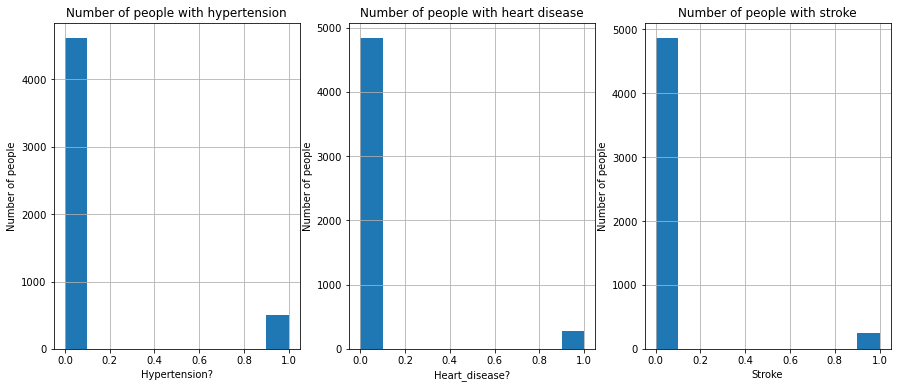

In [101]:
#number of people infected with hypertension, heart disease and stroke
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,6))

stroke_data['hypertension'].hist(ax=ax1)
ax1.set_title('Number of people with hypertension')
ax1.set_xlabel('Hypertension?')
ax1.set_ylabel('Number of people')

stroke_data['heart_disease'].hist(ax=ax2)
ax2.set_title('Number of people with heart disease')
ax2.set_xlabel('Heart_disease?')
ax2.set_ylabel('Number of people')

stroke_data['stroke'].hist(ax=ax3)
ax3.set_title('Number of people with stroke')
ax3.set_xlabel('Stroke')
ax3.set_ylabel('Number of people');

For the x-axis values in the histogram plots above, 1 represents the number of people infected with the disease while 0 represents the number of people who are not infected with the disease.<br>
Generally, a small percentage of the sample dataset are infected with either of the diseases. <br>
There are more people infected with hypertension in comparison with those people infected with heart disease or stroke.

### Age distribution, age categorization and grouping by the age categories

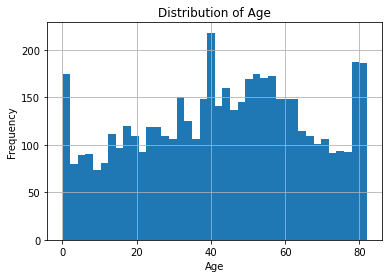

In [70]:
#histogram showing the age distribution
fig, ax = plt.subplots()

stroke_data['age'].hist(bins=40, ax=ax)
ax.set_title('Distribution of Age')
ax.set_ylabel('Frequency')
ax.set_xlabel('Age');

The distribution of age in the dataset is more of a normal distribution.<br>
The age can be grouped into three categories of young, middle_age and old. This will be useful in visualizing the large dataset with many unique age values.

In [40]:
#grouping the age data into three categories.
stroke_data['age_categories'] = stroke_data['age'].map(lambda x:  'old' if x > 60 else('young' if x < 20 else 'middle_age'))

In [41]:
#preview of the first five rows to check on the age_categories column
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_categories
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,old
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,old
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,old
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,middle_age
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,old


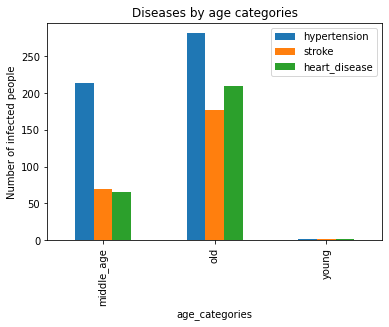

In [84]:
#bar graph showing number of infected people by age_categories
fig, ax = plt.subplots()

stroke_data.groupby('age_categories')[['hypertension', 'stroke', 'heart_disease']].sum().plot(kind = 'bar', ax=ax)
ax.set_title('Number of infected people by age categories')
ax.set_ylabel('Number of infected people');

The old are the majority of people with hypertension, stroke or heart disease.<br>
Very few young people are infected by either of the diseases.

### Grouping by type of residence

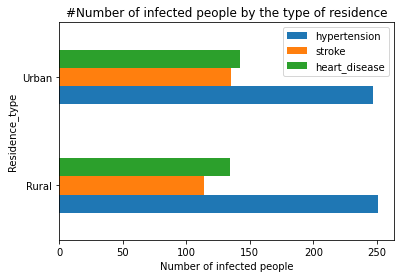

In [86]:
#horizontal bar graph showing number of infected people by type of residence
fig, ax = plt.subplots()

stroke_data.groupby('Residence_type')[['hypertension', 'stroke', 'heart_disease']].sum().plot.barh(ax=ax)
ax.set_title('#Number of infected people by the type of residence')
ax.set_xlabel('Number of infected people');

The number of people with hypertension is almost similar for both the urban and rural areas.<br>
There are a few more people infected with stroke and heart disease in the urban areas compared to the rural area.

### Scatter plot and correlation

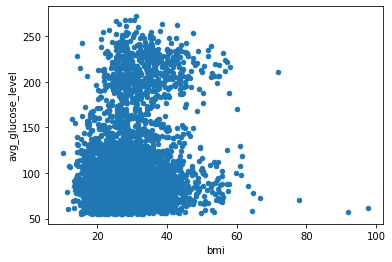

In [107]:
#relationship between bmi and average glucose level
stroke_data.plot.scatter(x='bmi', y='avg_glucose_level');

In [57]:
#correlation of columns
stroke_data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.005555,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.005555,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


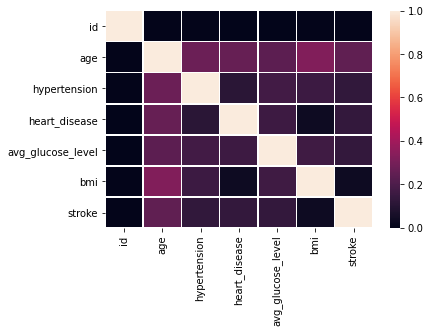

In [104]:
#plotting correlation heatmap using seaborn
sns.heatmap(stroke_data.corr(), linewidths=0.5);

The highest correlation is between bmi and age. <br>
Weak correlation between majority of the columns with other columns.